<a href="https://colab.research.google.com/github/ravendickaprio/AnalityX/blob/main/Abulon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ¿Puedes estimar la edad de un abulón?
* Antecedentes

---


Estás trabajando como pasante para una operación de cultivo de abulón en Japón. Por razones operativas y ambientales, es una consideración importante estimar la edad de los abulones cuando van al mercado.

Determinar la edad de un abulón implica contar el número de anillos en una sección transversal de la concha a través de un microscopio. Dado que este método es algo engorroso y complejo, le interesa ayudar a los agricultores a estimar la edad del abulón utilizando sus características físicas.



Características del abulón:
* "sexo" - M, F e I (bebé).
* "longitud" - medida de la concha más larga.
* "diámetro" - perpendicular a la longitud.
* "altura" - medida con carne en el caparazón.
* "whole_wt" - peso de abulón entero.
* "shucked_wt" - el peso de la carne de abulón.
* "viscera_wt" - peso intestinal.
* "shell_wt" - el peso de la cáscara seca.
* "anillos" - número de anillos en una sección transversal de la carcasa.
* "edad" - la edad del abulón: el número de anillos + 1,5





In [ ]:
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R


In [ ]:
file = 'https://raw.githubusercontent.com/analityxmlv/791328s/main/abalone.csv'
dt = pd.read_csv(file)

In [ ]:
dt.head()         # Sirve para mostrar la parte inicial de los datos
                  # dt.head(15) muestra las 15 primeras observaciones
                  # (Existen más funciones importantes y complementarias para ésto)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


¿Cómo cambia el peso con la edad para cada una de las tres categorías de sexo?


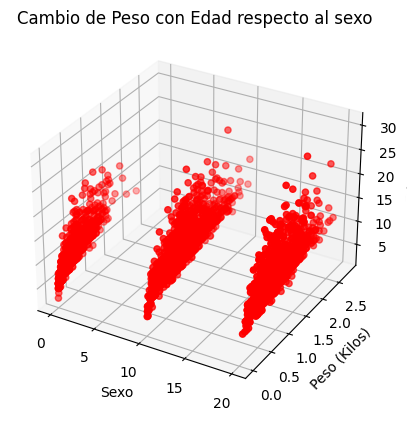

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dt["sex"].to_numpy()
x_fix =  []
for i in x:
    if i == "M":
      x_fix.append( 10) # 10 to M

    if i == "F":
      x_fix.append( 20) # 20 to F
    if i == "I":
      x_fix.append(0) # 0 to I

x = np.array(x_fix)
z = dt["age"].to_numpy()
y = dt["whole_wt"].to_numpy()

ax.scatter(x, y, z, color="red")
ax.set_title("Cambio de Peso con Edad respecto al sexo")
ax.set_xlabel('Sexo')        # Etiqueta del eje X
ax.set_ylabel('Peso (Kilos)')       # Etiqueta del eje Y
ax.set_zlabel('Edad ');        # Etiqueta del eje Z (Var.)
plt.show()


¿Puedes estimar la edad de un abulón usando sus características físicas?